# Figures for Network model of Status Epilepticus

It is save to "run all" cells as it will display jupyter widgets for the figures.


### Some imports and settings


In [1]:
%%html
<style>
.grey_bg{
    background-color: rgba(0,0,0,0.05);
    padding:0.1em 0.1em;
    border: 1px solid black;
    box-shadow: inset 0 0 0.5em rgba(0,0,0,0.5) ;
}
</style>


In [2]:
%load_ext autoreload
%autoreload 2

import ipywidgets
import warnings
from IPython.display import display, clear_output
import brian2.numpy_ as np
import matplotlib.pyplot as plt

from settings import COLOR, G_GABA_LIST, TAU_KCC2_LIST, text, logging

# start from defaults before loading stylesheet
plt.style.use("default")
plt.style.use("style/article.mplstyle")

# suppress warnings
np.seterr(all="ignore")
warnings.filterwarnings("ignore")

logger = logging.getLogger("lrd")

SAVE_FIGS = False
save_args = {}
interact_manual = ipywidgets.interact_manual.options(manual_name="Run")


def set_save_figs(
    save=SAVE_FIGS, use_args=False, close=False, file_formats=["svg", "jpg"]
):
    global SAVE_FIGS
    SAVE_FIGS = save
    save_args["use_args"] = use_args
    save_args["close"] = close
    save_args["file_formats"] = file_formats


save_widgets_interact = ipywidgets.interact(
    set_save_figs,
    file_formats=ipywidgets.SelectMultiple(
        options=["svg", "jpg", "png", "pdf"],
        value=["svg", "jpg"],
        rows=4,
        description="File formats",
    ),
)
save_widgets = save_widgets_interact.widget
save_widgets.children[0].description = "Save figure"
save_widgets.add_class("grey_bg")
# put into HBox with HTML heading "Saving figures"
save_widgets.children = (
    ipywidgets.HBox(
        (ipywidgets.HTML("<h3>Saving figure</h3>"),) + save_widgets.children,
        layout=ipywidgets.Layout(display="flex", align_items="center"),
    ),
)

interactive(children=(Checkbox(value=False, description='save'), Checkbox(value=False, description='use_args')…

# Explanatory figure - Figure 2B,C and supplementary

Step up EGABA constantly every $x$ (e.g. 40) seconds, and plot the resulting firing rate of the network.

Note: In figure 2 fo the paper, only a portion is shown. The extra panels relate to the supplementary figures and look at conductances and vesicle availability + utilisation.

Warning: This widget thus also the specification of the number of neurons but that this slows things down dramatically)


In [3]:
from scripts.lrdfigure_explain import Explain
from widgets import new_explain_widget


def run_explain(
    N=1000,
    mv_step=4,
    time_per_value=40,
    egaba_start=-78,
    egaba_end=-34,
    seed="1337",
    plot_igaba=False,
    plot_mean_rate=True,
    **kwargs,
):
    import shutil

    np.random.seed(int(seed))

    __device_directory = f".cpp_{hash(str(locals()))}"
    prev_log_level = logging.getLogger("root").getEffectiveLevel()

    explain = Explain()
    explain.setup(__device_directory=__device_directory)
    explain.run(
        N=N,
        mv_step=mv_step,
        time_per_value=time_per_value,
        egaba=[egaba_start, egaba_end],
        **kwargs,
    )
    plot_rates = ("r_all", "r_I", "r_E") if plot_mean_rate else ("r_I", "r_E")
    explain.plot(plot_igaba=plot_igaba, plot_rates=plot_rates)
    if SAVE_FIGS:
        explain.save_figure(**save_args)
    # remove __device_directory used by brian sim
    shutil.rmtree(__device_directory, ignore_errors=True)
    logging.getLogger("root").setLevel(prev_log_level)
    return explain


display(save_widgets)
new_explain_widget(run_explain)

interactive(children=(HBox(children=(HTML(value='<h3>Saving figure</h3>'), Checkbox(value=False, description='…

interactive(children=(IntSlider(value=1000, description='# neurons', layout=Layout(width='50%'), max=10000, mi…

# Alter conductances - Figure 2D+

1. Emulate picrotoxin (pink) by **reducing** $g_{GABA_{max}}$.
2. Emulate benzodiazepines (green) by **increasing** $g_{GABA_{max}}$.

We can see the effect of benzodiazepines depends on $E_{GABA}$.


In [4]:
from scripts.lrdfigure_drugs import Drugs
from widgets import new_drugs_widget


def run_drugs(benzo_strengths, egabas, picro_to_plot, benzo_to_plot):
    drugs = Drugs(benzo_strengths=benzo_strengths, egabas=egabas)
    drugs.run()
    drugs.plot(drugs_to_plot=(picro_to_plot, benzo_to_plot))
    if SAVE_FIGS:
        drugs.save_figure(**save_args)
    plt.show()
    return drugs


display(save_widgets)
new_drugs_widget(run_drugs)

interactive(children=(HBox(children=(HTML(value='<h3>Saving figure</h3>'), Checkbox(value=False, description='…

interactive(children=(VBox(children=(HBox(children=(SelectMultiple(description='Benzo strengths', index=(0, 1,…

## Start having dynamic chloride $Cl^-$

We compared networks with either hyperpolarised ($\approx E_{GABA} = -74 mV$) or depolarised ($ \approx E\_{GABA} = -46 mV$) EGABA.

The starting $E_{GABA}$ seems to have neglible, if any effect.

We further consider the effect of GABA conductance $g_{GABA_{max}}$ (brightness, rows) along with different $\tau_{KCC2}$ values (hue, traces).


In [5]:
from scripts.lrdfigure_chloride import Chloride
from widgets import new_chloride_widget


def run_chloride(
    tau_KCC2s,
    E_Cl_0s,
    g_GABAs,
    seeds,
    duration,
    burst_window,
    default_tau,
    stripplot_alpha,
    stripplot_size,
    stripplot_jitter,
):
    cl = Chloride(
        tau_KCC2s=tau_KCC2s,
        E_Cl_0s=E_Cl_0s,
        g_GABAs=g_GABAs,
        seeds=seeds,
    )
    cl.run(duration=duration).process(burst_window=burst_window)
    cl.plot(
        default_tau=default_tau,
        stripplot_alpha=stripplot_alpha,
        stripplot_size=stripplot_size,
        stripplot_jitter=stripplot_jitter,
    )
    if SAVE_FIGS:
        cl.save_figure(**save_args)
    return cl


display(save_widgets)
new_chloride_widget(run_chloride)

interactive(children=(HBox(children=(HTML(value='<h3>Saving figure</h3>'), Checkbox(value=False, description='…

interactive(children=(VBox(children=(VBox(children=(VBox(children=(HTML(value='<h3>Simulation Params</h3>'), H…

# Explore time constants of "Excitatory" and "Inhibitory" KCC2

$\tau_{KCC2_{exc}}$ = [15, 21, 30, 42, 60, 84, 120, 169, 240]

$\tau_{KCC2_{inh}}$ = [15, 21, 30, 42, 60, 84, 120, 169, 240]


In [6]:
from scripts.lrdfigure_tau import Tau
from widgets import new_tau_widget

base_seeds = (None, 1038, 1337, 1111, 1010)

full_G_GABA_LIST = G_GABA_LIST + [37, 75, 150]


def run_tau(
    tau_KCC2_E_list=TAU_KCC2_LIST,
    tau_KCC2_I_list=TAU_KCC2_LIST,
    g_GABA_list=full_G_GABA_LIST,
    repeat=(1, 10, 1),
    duration=600,
    nrn_idx_i=[0, 1, 2, 3],
    default_tau_i=30,
    default_tau_e=30,
    default_ggaba=50,
    plot_ggaba=G_GABA_LIST,
    with_corner_traces=True,
    run_idx=(0, 9, 1),
    use_mean=False,
    square_heatmap=False,
    all_major_ticks=False,
    cmap="viridis",
):
    if repeat > len(base_seeds):
        seeds = base_seeds + tuple(
            np.random.randint(0, 10000, repeat - len(base_seeds))
        )
    else:
        seeds = base_seeds[:repeat]

    if run_idx >= len(seeds):
        raise ValueError(f"run_idx out of range (must be < {len(seeds)})")

    tau = Tau(
        tau_KCC2_E_list=tau_KCC2_E_list,
        tau_KCC2_I_list=tau_KCC2_I_list,
        g_GABA_list=g_GABA_list,
        seeds=seeds,
    )

    tau.run(duration=duration, nrn_idx_i=nrn_idx_i)
    tau.process()
    tau.plot(
        default_tau_i=default_tau_i,
        default_tau_e=default_tau_e,
        default_ggaba=default_ggaba,
        plot_ggaba=plot_ggaba,
        with_corner_traces=with_corner_traces,
        run_idx=run_idx,
        use_mean=use_mean,
        square_heatmap=square_heatmap,
        all_major_ticks=all_major_ticks,
        cmap=cmap,
    )
    if SAVE_FIGS:
        tau.save_figure(**save_args)


display(save_widgets)
new_tau_widget(run_tau)

interactive(children=(HBox(children=(HTML(value='<h3>Saving figure</h3>'), Checkbox(value=False, description='…

interactive(children=(VBox(children=(HTML(value='<h3>Simulation Params</h3>'), HBox(children=(SelectMultiple(d…

# $g_{GABA_{max}}$ vs $\tau_{KCC2}$ with $E_{GABA}$

First, plot number of bursts as a function of $g_{GABA_{\rm{max}}}$ as we directly vary $E_{GABA}$ (static $Cl^-$).

Next, plot number of bursts and $E_{GABA}$ as a function of $g_{GABA_{\rm{max}}}$ and $\tau_{KCC2}$.

Finally, plot the relationship between the pre-burst GABAergic current ($I_{GABA}$) and the number of bursts. The $g_{GABA_{\rm{max}}}$ and $\tau_{KCC2}$ are displayed for reference as color and marker size, respectively. Squares are from static simulations.


In [7]:
from scripts.lrdfigure_ggaba_e import Gve, mean_igaba, sum_igaba

from widgets import new_gGABA_tauKCC2_widget
from widgets.ggaba_e import default_values


def run_gve(
    gGABAsvEGABA=default_values["gGABAsvEGABA"],
    gGABAs=default_values["gGABAs"],
    tau_KCC2s=default_values["tau_KCC2s"],
    seeds=default_values["seeds"],
    time_per_value=default_values["time_per_value"],
    mv_step=default_values["mv_step"],
    egaba_start=default_values["egaba_start"],
    egaba_end=default_values["egaba_end"],
    min_s=0,
    plot_3d=False,
    bursts_max=0,
    num_bursts="mean",
    i_metric=mean_igaba,
    egabas_plot=5,
):
    gve = Gve(
        seeds=seeds,
        gGABAsvEGABA=gGABAsvEGABA,
        gGABAs=gGABAs,
        tau_KCC2s=tau_KCC2s,
    )
    gve.run(
        time_per_value=time_per_value,
        EGABA_0=egaba_start,
        EGABA_end=egaba_end,
        mv_step=mv_step,
    )
    gve.process()

    if egabas_plot == 0:
        egabas_plot = None
    if min_s == 0:
        min_s = None
    if bursts_max == 0:
        bursts_max = None
    gve.plot(
        egabas_plot=egabas_plot,
        i_metric=i_metric,
        num_bursts=num_bursts,
        plot_3d=plot_3d,
        min_s=min_s,
        bursts_max=bursts_max,
    )

    if SAVE_FIGS:
        gve.save_figure(figs=gve.figs, **save_args)

    return gve


display(save_widgets)
new_gGABA_tauKCC2_widget(run_gve)

interactive(children=(HBox(children=(HTML(value='<h3>Saving figure</h3>'), Checkbox(value=False, description='…

interactive(children=(HBox(children=(HTML(value='<h3>Static Cloride Params</h3>'), SelectMultiple(description=…

## Supplementary: investigate how excitatory parameters affect the number of bursts.

Specifically, we vary:

1. $g_{AMPA_{\rm{max}}}$
2. $g_{NMDA_{\rm{max}}}$

And run static $Cl^-$ simulations at hyperpolarised (blue), close to $V_{rest}$ (purple), and depolarised (red) EGABA values.


In [8]:
from scripts.lrdfigure_gampa import Params
from widgets import new_exc_widget


def run_exc_params(
    gGABAs,
    gAMPAs,
    gNMDAs,
    seeds,
    egabas_plot: list,
    with_example_rates: bool = False,
):
    exc_params = Params(
        gGABAs=gGABAs,
        gAMPAs=gAMPAs,
        gNMDAs=gNMDAs,
        seeds=seeds,
    )
    exc_params.run()
    exc_params.process()

    exc_params.plot(egabas=egabas_plot)

    if SAVE_FIGS:
        exc_params.save_figure(**save_args)

    if with_example_rates:
        exc_params.plot_rate_example()

    return exc_params


new_exc_widget(run_exc_params)

interactive(children=(HBox(children=(SelectMultiple(description='gGABAs', index=(1, 2, 3), layout=Layout(width…

# Playground


`None` keeps default values (see `core.sim.py`)


In [9]:
from core.sim import single_run
from widgets import new_playground_widget
from brian2.units import ms


def single_run_default_values(
    N=1000,
    duration=90,
    dt=0.01,
    Mg2_t0=1.0,
    zero_mag_wash_rate=5,
    benzo_onset_t=False,
    benzo_wash_rate=5,
    benzo_strength=1,
    benzo_off_t=False,
    # p=0.02,
    p_ee=0.02,
    p_ie=0.02,
    p_ei=0.04,
    p_ii=0.04,
    # w=1,
    w_ee=1,
    w_ei=1,
    w_ie=1,
    w_ii=1,
    U_0=0.01,
    tau_d=10,
    tau_f=0.5,
    g_AMPA_max=5,
    g_NMDA_max=5,
    g_GABA_max=50,
    E_leak=-70,
    g_l_I=20,
    g_l_E=20,
    g_AMPA_max_ext=2,
    rate_ext=2,
    C_ext=800,
    manual_cl=False,
    E_Cl_0=-88.0,
    E_Cl_end=-88.0,
    num_ecl_steps=1,
    dyn_cl=True,
    E_Cl_target=-88.0,
    E_Cl_pop="both",
    tau_KCC2_E=60,
    tau_KCC2_I=60,
    length=7.5,
    nrn_idx_i=[0, 1],
    run_seed=11000,
):
    w_ee = str(w_ee)
    w_ei = str(w_ei)
    w_ie = str(w_ie)
    w_ii = str(w_ii)
    dt = np.round(dt, 3)
    E_Cl_pop = E_Cl_pop.replace("PC", "E").replace("IN", "I")
    if manual_cl:
        manual_cl = manual_cl.replace("E", "PC").replace("I", "IN")
    args = locals()
    
    return single_run(**args, __plot=True, __device_directory=f".cpp_{hash(str(args))}")


new_playground_widget(single_run_default_values)

interactive(children=(HBox(children=(HTML(value='<h1>Simulation parameters</h1>', layout=Layout(width='200px')…

INFO       Overwriting environment variable "DYLD_LIBRARY_PATH" [brian2.devices.cpp_standalone.device.overwritten_env_var]


Starting simulation at t=0 s for duration 440 s
25.5974 s (5%) simulated in 10s, estimated 2m 42s remaining.
51.4691 s (11%) simulated in 20s, estimated 2m 31s remaining.
76.9673 s (17%) simulated in 30s, estimated 2m 22s remaining.
102.899 s (23%) simulated in 40s, estimated 2m 11s remaining.
128.849 s (29%) simulated in 50s, estimated 2m 1s remaining.
154.35 s (35%) simulated in 1m 0s, estimated 1m 51s remaining.
180.163 s (40%) simulated in 1m 10s, estimated 1m 41s remaining.
205.838 s (46%) simulated in 1m 20s, estimated 1m 31s remaining.
231.205 s (52%) simulated in 1m 30s, estimated 1m 21s remaining.
257.539 s (58%) simulated in 1m 40s, estimated 1m 11s remaining.
283.014 s (64%) simulated in 1m 50s, estimated 1m 1s remaining.
307.574 s (69%) simulated in 2m 0s, estimated 52s remaining.
333.19 s (75%) simulated in 2m 10s, estimated 42s remaining.
358.419 s (81%) simulated in 2m 20s, estimated 32s remaining.
384.414 s (87%) simulated in 2m 30s, estimated 22s remaining.
410.21 s (9

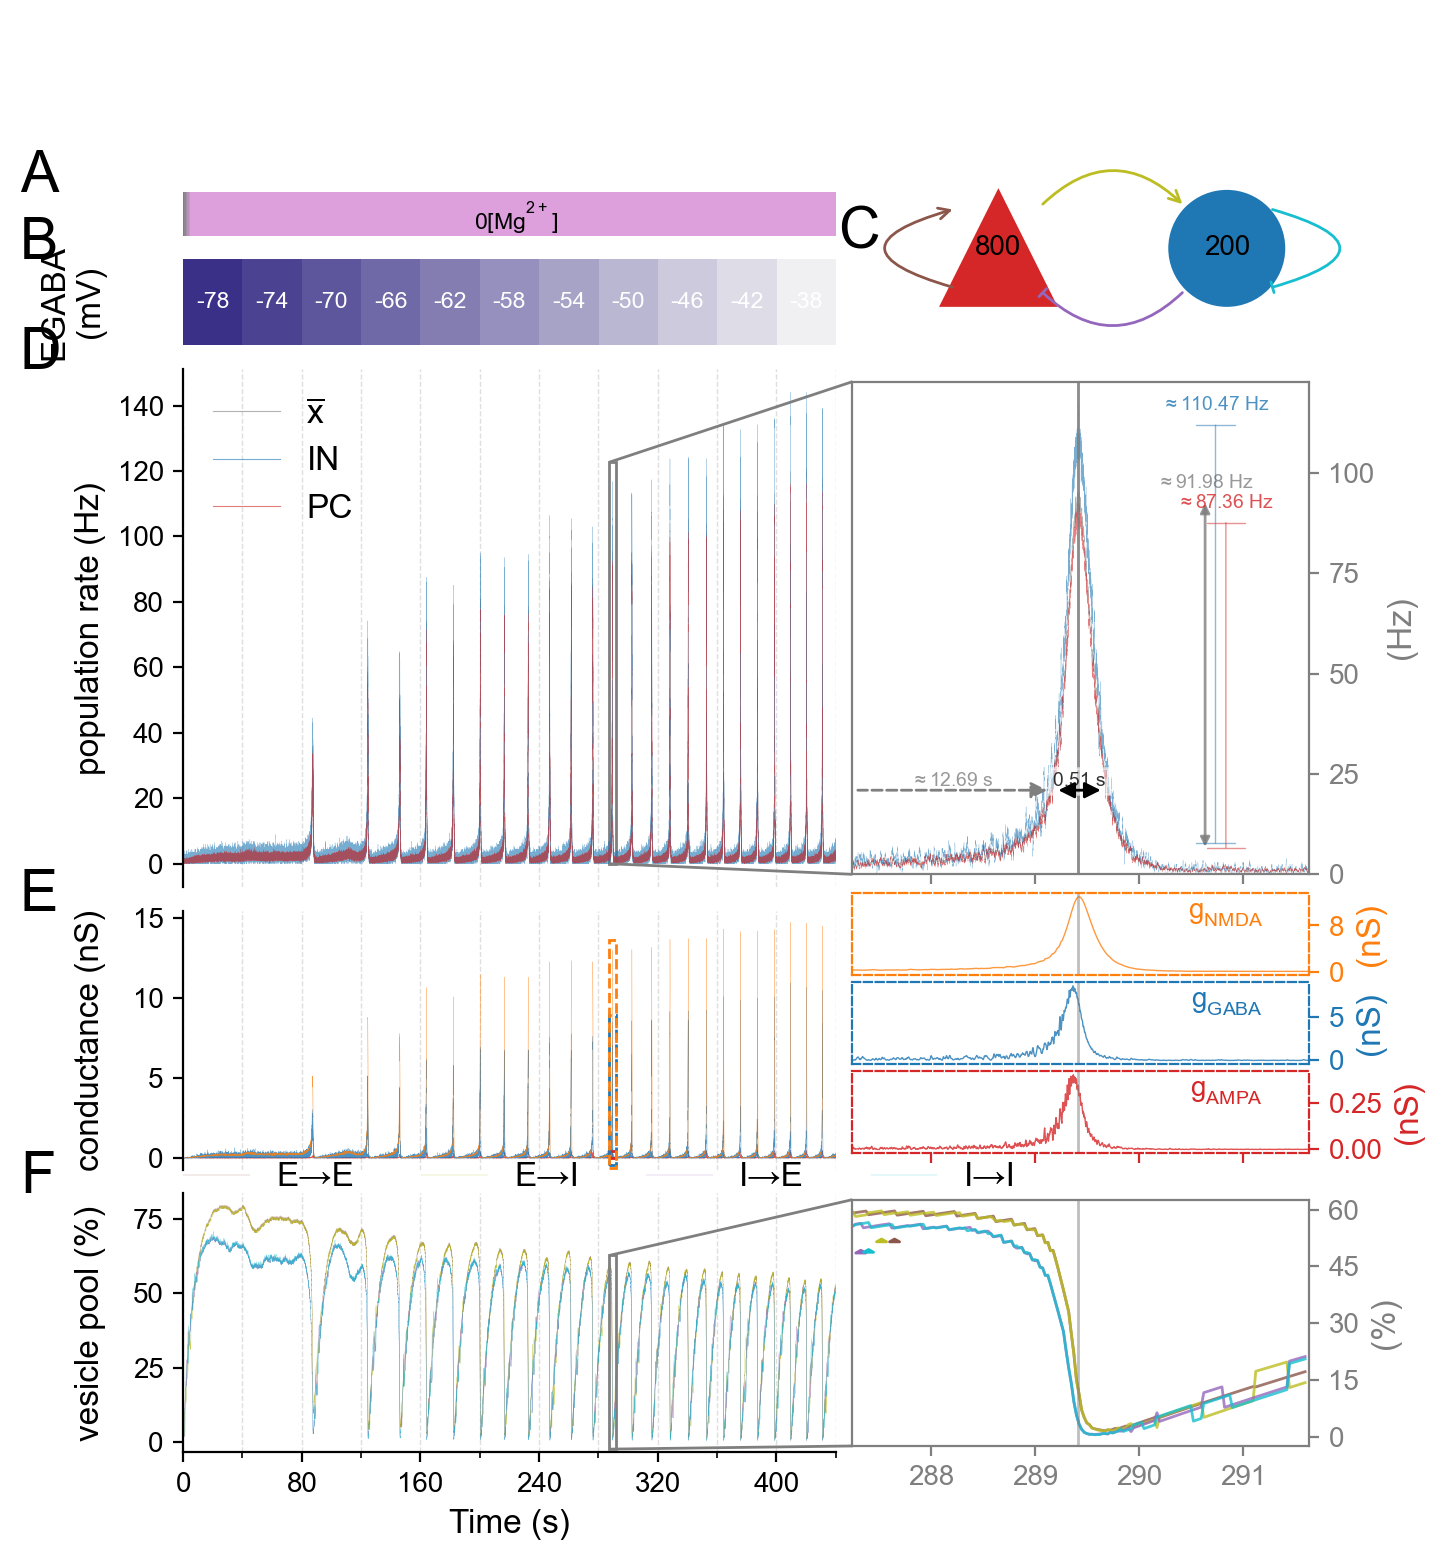

In [11]:
# alternative formulation for lower leak conductance. which means it requires fewer external inputs to suppress
run_explain(g_l_E=1, g_l_I=1, g_AMPA_max_ext=1, C_ext=100)